In [58]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Data Preprocessing

In [60]:
X_train = X_train/225
X_test = X_test/225

In [61]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [83]:
32*32*3+10

3082

# Random Search Hyperparameters

In [62]:
keras.backend.clear_session()
InitSeed = 767
tf.random.set_seed(InitSeed)
np.random.seed(InitSeed)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow.keras.optimizers import Nadam, RMSprop


from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(neurons1, neurons2,neurons3, neurons4, activation, optimizer, init_mode, dropout_rate):
    
    # create model
    model = Sequential()
    model.add(Flatten(input_shape=[32,32,3]))
    
    model.add(Dense(neurons1, activation=activation, kernel_initializer=init_mode))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(neurons2, activation=activation, kernel_initializer=init_mode))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(neurons3, activation=activation, kernel_initializer=init_mode))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(neurons4, activation=activation, kernel_initializer=init_mode))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss="categorical_crossentropy", 
                    optimizer=optimizer,  # OPTIMIZER
                    metrics=["accuracy"]) # Accuracy performance metric
    return model

# Create Hyperparameters 
epochs = [50, 100, 150]
optimizer = ['Adadelta', 'Adagrad', 'Adamax','RMSprop', 'Nadam']
neurons1 = [256, 512, 1024, 2048, 3072]
neurons2 = [256, 512, 1024, 2048]
neurons3 = [256, 512, 1024, 2048]
neurons4 = [256, 512, 1024, 2048]
batch_size = [500, 750, 1000]
activation = ['elu', 'relu', 'selu']
init_mode = ['uniform', 'lecun_uniform', 'zero', 
             'glorot_uniform', 'he_normal', 'he_uniform']

dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

# Create hyperparameter options
param_grid = dict(neurons1=neurons1, neurons3= neurons3, neurons2=neurons2, neurons4=neurons4, activation= activation,
                 optimizer = optimizer, init_mode = init_mode, dropout_rate = dropout_rate, 
                  epochs = epochs, batch_size = batch_size)

In [63]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

rand = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                            n_iter=4, n_jobs=-1) 

rand_output = rand.fit(X_test, y_cat_test) # Search results based on the “test” data 
print("Best: {} using {}".format(rand_output.best_score_, rand_output.best_params_))

Init Plugin
Init Plugin
Init Plugin
Init Plugin
Init Plugin
Init Plugin
Init Plugin
Init Plugin
Init Graph Optimizer
Init Graph Optimizer
Init Graph Optimizer
Init Graph Optimizer
Init Kernel
Init Kernel
Init Kernel
Init Kernel
Init Graph Optimizer
Init Kernel
Init Graph Optimizer
Init Graph Optimizer
Init Graph Optimizer
Init Kernel
Init Kernel
Init Kernel
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1


2021-11-14 13:19:46.756895: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-14 13:19:46.756893: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-14 13:19:46.757049: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-11-14 13:19:46.766178: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

2021-11-14 13:22:59.944834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-14 13:23:02.461863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



systemMemory: 16.00 GB
maxCacheSize: 5.33 GB


systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2021-11-14 14:03:47.429309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-14 14:04:09.404288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-14 14:04:13.802799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-14 14:04:45.907459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-14 14:04:58.628727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-14 14:04:59.171052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Best: 0.36050001382827757 using {'optimizer': 'RMSprop', 'neurons4': 2048, 'neurons3': 512, 'neurons2': 1024, 'neurons1': 1024, 'init_mode': 'uniform', 'epochs': 150, 'dropout_rate': 0.4, 'batch_size': 500, 'activation': 'elu'}


In [64]:
best_para = rand_output.best_params_
best_para

{'optimizer': 'RMSprop',
 'neurons4': 2048,
 'neurons3': 512,
 'neurons2': 1024,
 'neurons1': 1024,
 'init_mode': 'uniform',
 'epochs': 150,
 'dropout_rate': 0.4,
 'batch_size': 500,
 'activation': 'elu'}

# Random Search Hyperparameters to find Learning Rate

In [65]:
# To save time decided to use LR = 0.001

def create_model_new(learn_rate):
    
    # create model
    model = Sequential()
    model.add(Flatten(input_shape=[32,32,3]))
    
    model.add(Dense(best_para['neurons1'], activation=best_para['activation'], 
                    kernel_initializer=best_para['init_mode'])) # Layer 1
    model.add(Dropout(best_para['dropout_rate']))

    model.add(Dense(best_para['neurons2'], activation=best_para['activation'], 
                    kernel_initializer=best_para['init_mode'])) # Layer 2
    model.add(Dropout(best_para['dropout_rate']))
    
    model.add(Dense(best_para['neurons3'], activation=best_para['activation'], 
                    kernel_initializer=best_para['init_mode'])) # Layer 3
    model.add(Dropout(best_para['dropout_rate']))
    
    model.add(Dense(best_para['neurons4'], activation=best_para['activation'], 
                    kernel_initializer=best_para['init_mode'])) # Layer 4
    model.add(Dropout(best_para['dropout_rate']))

    model.add(Dense(10, activation='softmax')) # Output layer

    model.compile(loss='categorical_crossentropy',
                  optimizer= Nadam(learning_rate=learn_rate),
                  metrics=['accuracy']) 

    return model
    


In [66]:
"""
model = KerasClassifier(build_fn=create_model_new, epochs=best_para['epochs'], 
                        batch_size=best_para['batch_size'], verbose=0)

learn_rate = [0.001, 0.01, 0.03, 0.1, 0.3]
param_grid = dict(learn_rate=learn_rate)

from sklearn.model_selection import RandomizedSearchCV

rand = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                            n_iter=4, n_jobs=-1) 
import warnings
warnings.filterwarnings('ignore')
rand_output = rand.fit(X_test, y_cat_test) # Search results based on the “test” data 
print("Best: {} using {}".format(rand_output.best_score_, rand_output.best_params_))
"""

'\nmodel = KerasClassifier(build_fn=create_model_new, epochs=best_para[\'epochs\'], \n                        batch_size=best_para[\'batch_size\'], verbose=0)\n\nlearn_rate = [0.001, 0.01, 0.03, 0.1, 0.3]\nparam_grid = dict(learn_rate=learn_rate)\n\nfrom sklearn.model_selection import RandomizedSearchCV\n\nrand = RandomizedSearchCV(estimator=model, param_distributions=param_grid, \n                            n_iter=4, n_jobs=-1) \nimport warnings\nwarnings.filterwarnings(\'ignore\')\nrand_output = rand.fit(X_test, y_cat_test) # Search results based on the “test” data \nprint("Best: {} using {}".format(rand_output.best_score_, rand_output.best_params_))\n'

In [67]:
#best_para['learn_rate'] = rand_output.best_params_['learn_rate']
best_para['learn_rate'] = 0.001
best_para

{'optimizer': 'RMSprop',
 'neurons4': 2048,
 'neurons3': 512,
 'neurons2': 1024,
 'neurons1': 1024,
 'init_mode': 'uniform',
 'epochs': 150,
 'dropout_rate': 0.4,
 'batch_size': 500,
 'activation': 'elu',
 'learn_rate': 0.001}

## MLP structure without Batch Normalization

In [68]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix, accuracy_score

def metrics(y_test, y_cat_test, predictions, model):
    import warnings
    warnings.filterwarnings('ignore')
    
    print("############################ Classification Report ############################\n\n",
          classification_report(y_test, predictions))
    
    plt.figure(figsize=(15,6))
    sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap="Blues" ,fmt='g')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix')
    plt.show()
    
    metrics_data = (model.evaluate(X_test, y_cat_test,verbose=0))
    
    print("Accuracy: {}%".format(round(metrics_data[1] * 100 ,2 )))
    print("Loss: {}\n".format(metrics_data[0]))

In [69]:
early_stop = EarlyStopping(monitor='val_accuracy',mode = "max", patience=7, verbose=1)

In [70]:
keras.backend.clear_session()
InitSeed = 767
tf.random.set_seed(InitSeed)
np.random.seed(InitSeed)

# Time-based decay
initial_learning_rate = 0.1
epoch = 150
decay = initial_learning_rate / epoch
def lr_scheduler(epoch, learning_rate):
    return learning_rate * 1 / (1 + decay * epoch)

In [71]:
## MLP structure without BatchNormalization
def my_design():

    model = Sequential()
    model.add(Flatten(input_shape=[32,32,3]))
    
    model.add(Dense(1024, activation='selu', kernel_initializer='he_uniform')) # Layer 1
    model.add(Dropout(0.3))

    model.add(Dense(1024, activation='selu', kernel_initializer='he_uniform')) # Layer 2
    model.add(Dropout(0.3))
    
    model.add(Dense(512, activation='selu', kernel_initializer='he_uniform')) # Layer 3
    model.add(Dropout(0.3))
    
    model.add(Dense(2048, activation='selu', kernel_initializer='he_uniform')) # Layer 4
    model.add(Dropout(0.3))

    model.add(Dense(10, activation='softmax')) # Output layer

    model.compile(loss='categorical_crossentropy',
                  optimizer= Nadam(learning_rate=0.001),
                  metrics=['accuracy']) 

    model.fit(X_train, y_cat_train, epochs=150, batch_size = 500, validation_data=(X_test, y_cat_test), 
              callbacks=[early_stop, LearningRateScheduler(lr_scheduler, verbose=1)])
    
    return model

In [72]:
mlp = my_design()
losses = pd.DataFrame(mlp.history.history)

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-14 14:06:43.422238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 57/100 [================>.............] - ETA: 2s - loss: 8.9655 - accuracy: 0.1191
systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

100/100 [==============================] - ETA: 0s - loss: 6.8035 - accuracy: 0.1257

2021-11-14 14:06:48.396274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 6s 52ms/step - loss: 6.8035 - accuracy: 0.1257 - val_loss: 2.9522 - val_accuracy: 0.1368
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 5s 48ms/step - loss: 3.3525 - accuracy: 0.1514 - val_loss: 2.2767 - val_accuracy: 0.2156
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 5s 48ms/step - loss: 2.9923 - accuracy: 0.1785 - val_loss: 2.2721 - val_accuracy: 0.2397
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 5s 48ms/step - loss: 2.7872 - accuracy: 0.1957 - val_loss: 2.1415 - val_accuracy: 0.2619
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 5s 48ms/step - loss: 2.5978 - accuracy: 0.

100/100 [==============================] - 5s 49ms/step - loss: 1.4640 - accuracy: 0.4775 - val_loss: 1.3990 - val_accuracy: 0.5042
Epoch 36/150

Epoch 00036: LearningRateScheduler reducing learning rate to 0.0006592021580081711.
100/100 [==============================] - 5s 49ms/step - loss: 1.4519 - accuracy: 0.4804 - val_loss: 1.4303 - val_accuracy: 0.4858
Epoch 37/150

Epoch 00037: LearningRateScheduler reducing learning rate to 0.0006437521165025828.
100/100 [==============================] - 5s 50ms/step - loss: 1.4239 - accuracy: 0.4898 - val_loss: 1.4288 - val_accuracy: 0.4879
Epoch 38/150

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0006282551475560018.
  5/100 [>.............................] - ETA: 4s - loss: 1.4294 - accuracy: 0.4868
systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

100/100 [==============================] - 5s 50ms/step - loss: 1.4176 - accuracy: 0.4907 - val_loss: 1.3892 - val_accuracy: 0.5032
Epoch 39/150

Epoch 00039: LearningRateSchedule

Epoch 70/150

Epoch 00070: LearningRateScheduler reducing learning rate to 0.00020480547739142982.
100/100 [==============================] - 5s 50ms/step - loss: 1.0476 - accuracy: 0.6218 - val_loss: 1.2256 - val_accuracy: 0.5650
Epoch 71/150

Epoch 00071: LearningRateScheduler reducing learning rate to 0.00019567401966252097.
100/100 [==============================] - 5s 50ms/step - loss: 1.0413 - accuracy: 0.6242 - val_loss: 1.2160 - val_accuracy: 0.5695
Epoch 72/150

Epoch 00072: LearningRateScheduler reducing learning rate to 0.00018683069650579377.
100/100 [==============================] - 5s 50ms/step - loss: 1.0347 - accuracy: 0.6278 - val_loss: 1.2232 - val_accuracy: 0.5629
Epoch 73/150

Epoch 00073: LearningRateScheduler reducing learning rate to 0.0001782735695045811.
100/100 [==============================] - 5s 50ms/step - loss: 1.0294 - accuracy: 0.6282 - val_loss: 1.2207 - val_accuracy: 0.5702
Epoch 74/150

Epoch 00074: LearningRateScheduler reducing learning rate to 0.

2021-11-14 14:15:12.243658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.65      0.67      0.66      1000
           1       0.73      0.64      0.68      1000
           2       0.47      0.44      0.46      1000
           3       0.38      0.47      0.42      1000
           4       0.51      0.48      0.50      1000
           5       0.49      0.43      0.46      1000
           6       0.60      0.68      0.64      1000
           7       0.70      0.61      0.65      1000
           8       0.68      0.72      0.70      1000
           9       0.64      0.65      0.65      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



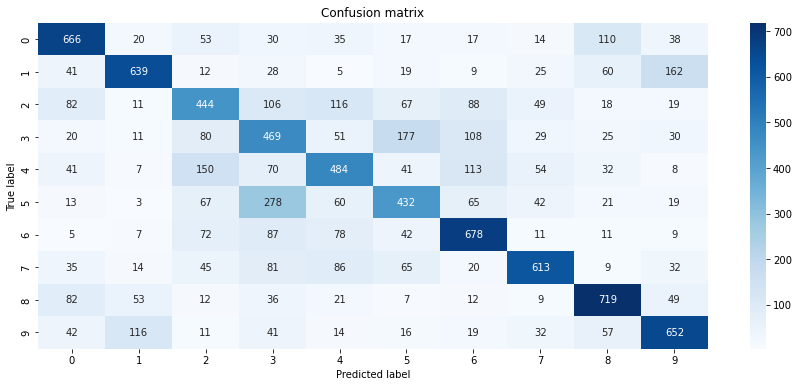

2021-11-14 14:15:14.186819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 57.96%
Loss: 1.2071877717971802



In [73]:
#predictions = mlp.predict_classes(X_test) 
predictions = np.argmax(mlp.predict(X_test), axis=-1)
metrics(y_test, y_cat_test, predictions, mlp)

## MLP structure with Batch Normalization

In [74]:
## MLP structure with BatchNormalization

keras.backend.clear_session()
InitSeed = 767
tf.random.set_seed(InitSeed)
np.random.seed(InitSeed)

"""
Dropout is meant to block information from certain neurons completely to make sure the neurons do not co-adapt. 
So, the batch normalization has to be after dropout otherwise you are passing information through 
normalization statistics.

If you think about it, in typical ML problems, this is the reason we don't compute mean and standard deviation 
over entire data and then split it into train, test and validation sets. We split and then compute the statistics 
over the train set and use them to normalize and center the validation and test datasets
"""

def my_design_batch(activate, opt):

    model = Sequential()
    model.add(Flatten(input_shape=[32,32,3]))
    
    model.add(Dense(1024, activation=activate, kernel_initializer='he_uniform')) # Layer 1
    model.add(Dropout(0.3))
    model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
    
    model.add(Dense(1024, activation=activate, kernel_initializer='he_uniform')) # Layer 2
    model.add(Dropout(0.3))
    model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
    
    model.add(Dense(512, activation=activate, kernel_initializer='he_uniform')) # Layer 3
    model.add(Dropout(0.3))
    model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
    
    
    model.add(Dense(2048, activation=activate, kernel_initializer='he_uniform')) # Layer 4
    model.add(Dropout(0.3))
    model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
    
    model.add(Dense(10, activation='softmax')) # Output layer

    model.compile(loss='categorical_crossentropy',
                  optimizer= opt,
                  metrics=['accuracy']) 

    model.fit(X_train, y_cat_train, epochs=150, batch_size = 500, validation_data=(X_test, y_cat_test), 
              callbacks=[early_stop, LearningRateScheduler(lr_scheduler, verbose=1)])
    
    return model

# MLP structure with Batch Normalization using different activation functions

In [51]:
def main(mlp_b):
    
    losses_b = pd.DataFrame(mlp_b.history.history)
    
    predictions = mlp_b.predict_classes(X_test) 
    metrics(y_test, y_cat_test, predictions, mlp_b)
    
    fig, axes = plt.subplots(ncols=2, nrows = 1)

    losses[['accuracy','val_accuracy']].plot(figsize=(20,7), 
                                     title="Train_Accuracy vs Test_Accuracy without Batch Normalization", 
                                     xlabel="Epochs",
                                     ylabel="Accuracy_Score", ax=axes[0])

    losses_b[['accuracy','val_accuracy']].plot(figsize=(20,7), 
                                             title="Train_Accuracy vs Test_Accuracy with Batch Normalization", 
                                             xlabel="Epochs",
                                            ylabel="Accuracy_Score", ax=axes[1])
    fig.show()

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-14 14:15:17.583838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 2.2568 - accuracy: 0.2508

2021-11-14 14:15:23.255353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 6s 58ms/step - loss: 2.2568 - accuracy: 0.2508 - val_loss: 1.9004 - val_accuracy: 0.3256
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 6s 57ms/step - loss: 1.9572 - accuracy: 0.3172 - val_loss: 1.8084 - val_accuracy: 0.3764
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 6s 57ms/step - loss: 1.8001 - accuracy: 0.3605 - val_loss: 1.7443 - val_accuracy: 0.3862
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 6s 57ms/step - loss: 1.6858 - accuracy: 0.3971 - val_loss: 1.6691 - val_accuracy: 0.4137
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 6s 57ms/step - loss: 1.6173 - accuracy: 0.

100/100 [==============================] - 6s 57ms/step - loss: 0.9833 - accuracy: 0.6450 - val_loss: 1.3202 - val_accuracy: 0.5542
Epoch 38/150

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0006282551475560018.
100/100 [==============================] - 6s 57ms/step - loss: 0.9666 - accuracy: 0.6528 - val_loss: 1.3075 - val_accuracy: 0.5521
Epoch 39/150

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0006127325744974888.
100/100 [==============================] - 6s 58ms/step - loss: 0.9537 - accuracy: 0.6557 - val_loss: 1.2591 - val_accuracy: 0.5731
Epoch 40/150

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0005972052113739428.
100/100 [==============================] - 6s 57ms/step - loss: 0.9388 - accuracy: 0.6615 - val_loss: 1.2707 - val_accuracy: 0.5645
Epoch 41/150

Epoch 00041: LearningRateScheduler reducing learning rate to 0.0005816933646036143.
100/100 [==============================] - 6s 57ms/step - loss: 0.9273 - accurac

Epoch 73/150

Epoch 00073: LearningRateScheduler reducing learning rate to 0.0001782735695045811.
100/100 [==============================] - 6s 56ms/step - loss: 0.6329 - accuracy: 0.7709 - val_loss: 1.3034 - val_accuracy: 0.5927
Epoch 74/150

Epoch 00074: LearningRateScheduler reducing learning rate to 0.00017000021949085985.
100/100 [==============================] - 6s 56ms/step - loss: 0.6250 - accuracy: 0.7739 - val_loss: 1.3167 - val_accuracy: 0.5935
Epoch 75/150

Epoch 00075: LearningRateScheduler reducing learning rate to 0.0001620078312790464.
100/100 [==============================] - 6s 56ms/step - loss: 0.6196 - accuracy: 0.7734 - val_loss: 1.3178 - val_accuracy: 0.5957
Epoch 00075: early stopping


2021-11-14 14:22:27.843165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.64      0.68      0.66      1000
           1       0.71      0.69      0.70      1000
           2       0.50      0.46      0.48      1000
           3       0.40      0.46      0.43      1000
           4       0.52      0.52      0.52      1000
           5       0.53      0.47      0.50      1000
           6       0.61      0.68      0.65      1000
           7       0.70      0.65      0.67      1000
           8       0.72      0.69      0.71      1000
           9       0.66      0.65      0.65      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



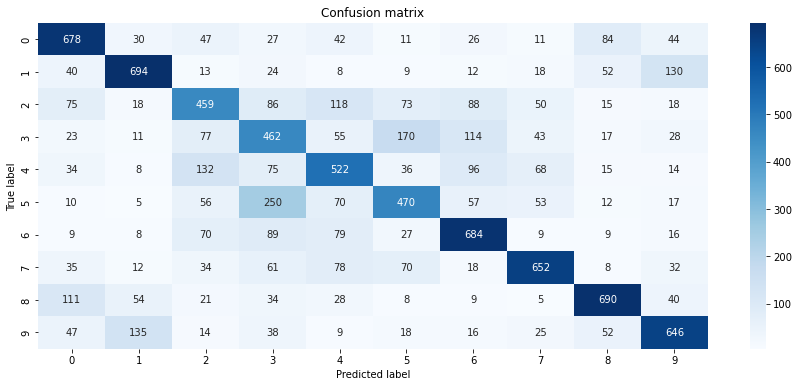

2021-11-14 14:22:29.971674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 59.57%
Loss: 1.3177516460418701



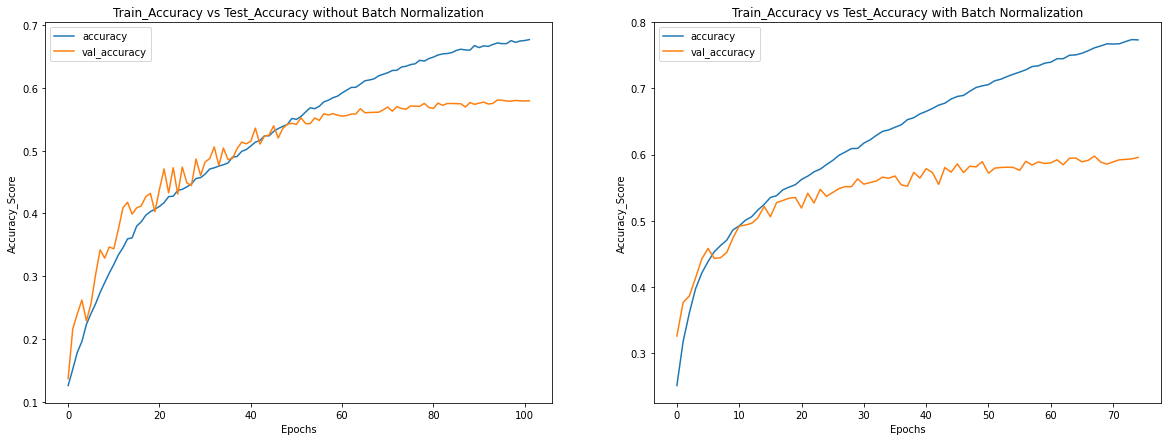

In [75]:
mlp_b = my_design_batch('selu', RMSprop(learning_rate=0.001))
main(mlp_b)

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-14 14:22:33.775329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 2.1672 - accuracy: 0.2673

2021-11-14 14:22:39.980174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 7s 63ms/step - loss: 2.1672 - accuracy: 0.2673 - val_loss: 1.8469 - val_accuracy: 0.3438
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 6s 60ms/step - loss: 1.8669 - accuracy: 0.3430 - val_loss: 1.7271 - val_accuracy: 0.3951
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 6s 60ms/step - loss: 1.7408 - accuracy: 0.3820 - val_loss: 1.6280 - val_accuracy: 0.4181
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 6s 60ms/step - loss: 1.6504 - accuracy: 0.4113 - val_loss: 1.6370 - val_accuracy: 0.4197
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 6s 62ms/step - loss: 1.5943 - accuracy: 0.

100/100 [==============================] - 6s 61ms/step - loss: 1.0613 - accuracy: 0.6195 - val_loss: 1.2223 - val_accuracy: 0.5728
Epoch 38/150

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0006282551475560018.
100/100 [==============================] - 6s 62ms/step - loss: 1.0445 - accuracy: 0.6247 - val_loss: 1.2531 - val_accuracy: 0.5633
Epoch 39/150

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0006127325744974888.
100/100 [==============================] - 6s 61ms/step - loss: 1.0347 - accuracy: 0.6297 - val_loss: 1.2321 - val_accuracy: 0.5706
Epoch 40/150

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0005972052113739428.
100/100 [==============================] - 6s 62ms/step - loss: 1.0247 - accuracy: 0.6323 - val_loss: 1.2235 - val_accuracy: 0.5735
Epoch 41/150

Epoch 00041: LearningRateScheduler reducing learning rate to 0.0005816933646036143.
100/100 [==============================] - 6s 61ms/step - loss: 1.0116 - accurac

2021-11-14 14:30:07.371526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.66      0.63      0.65      1000
           1       0.72      0.67      0.70      1000
           2       0.52      0.43      0.47      1000
           3       0.42      0.42      0.42      1000
           4       0.48      0.55      0.51      1000
           5       0.51      0.48      0.49      1000
           6       0.62      0.67      0.64      1000
           7       0.69      0.64      0.66      1000
           8       0.66      0.75      0.70      1000
           9       0.63      0.67      0.65      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



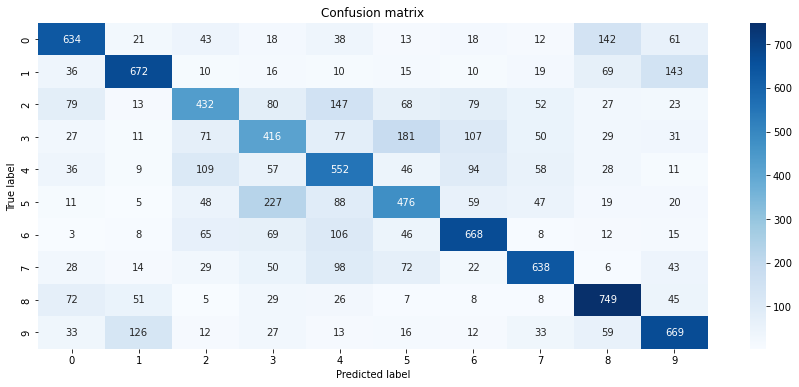

2021-11-14 14:30:09.311461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 59.06%
Loss: 1.238006353378296



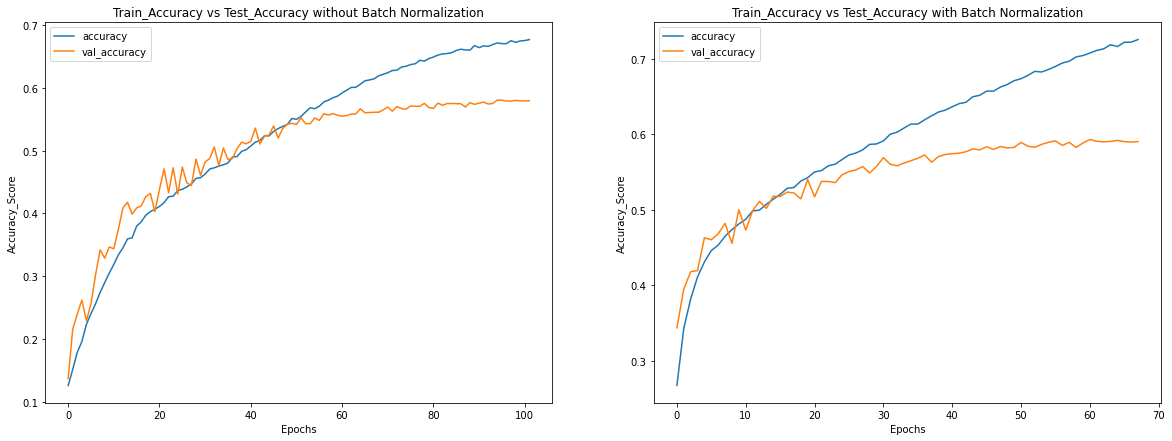

In [76]:
mlp_b = my_design_batch('selu', Nadam(learning_rate=0.001))
main(mlp_b)

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-14 14:30:12.987126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 2.2286 - accuracy: 0.2561

2021-11-14 14:30:18.654580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 6s 58ms/step - loss: 2.2286 - accuracy: 0.2561 - val_loss: 1.8196 - val_accuracy: 0.3518
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 6s 56ms/step - loss: 1.9129 - accuracy: 0.3327 - val_loss: 1.8043 - val_accuracy: 0.3802
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 6s 56ms/step - loss: 1.7556 - accuracy: 0.3745 - val_loss: 1.7027 - val_accuracy: 0.4028
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 6s 56ms/step - loss: 1.6538 - accuracy: 0.4103 - val_loss: 1.7029 - val_accuracy: 0.3998
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 6s 57ms/step - loss: 1.5868 - accuracy: 0.

100/100 [==============================] - 6s 57ms/step - loss: 0.8892 - accuracy: 0.6817 - val_loss: 1.3413 - val_accuracy: 0.5603
Epoch 38/150

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0006282551475560018.
100/100 [==============================] - 6s 56ms/step - loss: 0.8713 - accuracy: 0.6875 - val_loss: 1.3320 - val_accuracy: 0.5533
Epoch 39/150

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0006127325744974888.
100/100 [==============================] - 6s 57ms/step - loss: 0.8520 - accuracy: 0.6922 - val_loss: 1.2636 - val_accuracy: 0.5742
Epoch 40/150

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0005972052113739428.
100/100 [==============================] - 6s 58ms/step - loss: 0.8459 - accuracy: 0.6953 - val_loss: 1.2678 - val_accuracy: 0.5745
Epoch 41/150

Epoch 00041: LearningRateScheduler reducing learning rate to 0.0005816933646036143.
100/100 [==============================] - 6s 59ms/step - loss: 0.8275 - accurac

Epoch 73/150

Epoch 00073: LearningRateScheduler reducing learning rate to 0.0001782735695045811.
100/100 [==============================] - 6s 56ms/step - loss: 0.4978 - accuracy: 0.8210 - val_loss: 1.4161 - val_accuracy: 0.5957
Epoch 74/150

Epoch 00074: LearningRateScheduler reducing learning rate to 0.00017000021949085985.
100/100 [==============================] - 6s 57ms/step - loss: 0.4964 - accuracy: 0.8189 - val_loss: 1.4067 - val_accuracy: 0.5981
Epoch 75/150

Epoch 00075: LearningRateScheduler reducing learning rate to 0.0001620078312790464.
100/100 [==============================] - 6s 57ms/step - loss: 0.4913 - accuracy: 0.8221 - val_loss: 1.4096 - val_accuracy: 0.5962
Epoch 76/150

Epoch 00076: LearningRateScheduler reducing learning rate to 0.00015429316720526134.
100/100 [==============================] - 6s 58ms/step - loss: 0.4879 - accuracy: 0.8230 - val_loss: 1.4256 - val_accuracy: 0.5982
Epoch 77/150

Epoch 00077: LearningRateScheduler reducing learning rate to 0.0

2021-11-14 14:39:28.462700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.66      0.68      0.67      1000
           1       0.73      0.68      0.70      1000
           2       0.51      0.50      0.50      1000
           3       0.41      0.45      0.43      1000
           4       0.52      0.53      0.53      1000
           5       0.53      0.47      0.49      1000
           6       0.64      0.68      0.66      1000
           7       0.68      0.65      0.66      1000
           8       0.68      0.72      0.70      1000
           9       0.65      0.66      0.66      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



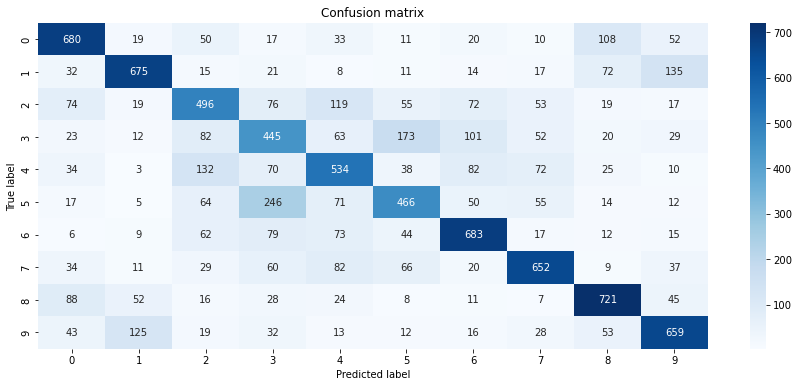

2021-11-14 14:39:30.438863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 60.11%
Loss: 1.4608808755874634



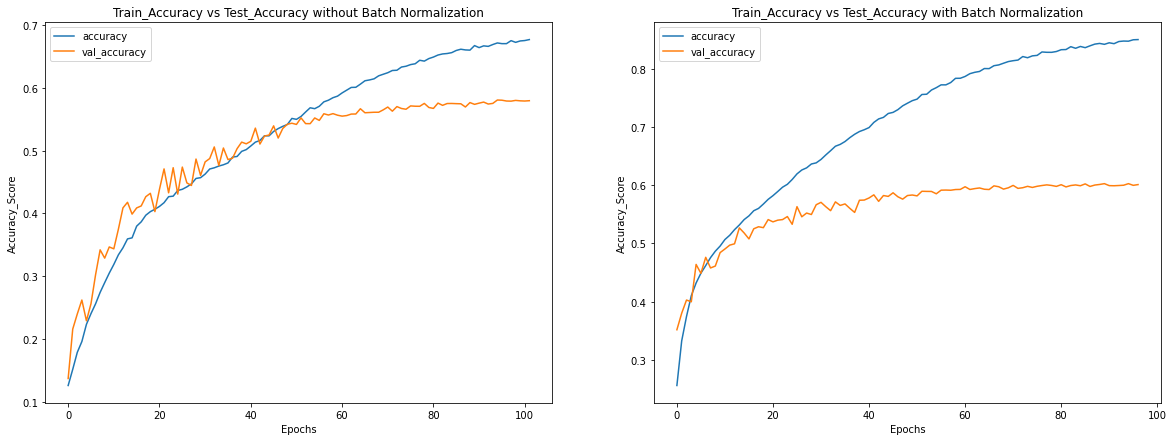

In [77]:
mlp_b = my_design_batch('elu', RMSprop(learning_rate=0.001))
main(mlp_b)

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-14 14:39:34.484147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 2.1362 - accuracy: 0.2756

2021-11-14 14:39:41.003529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 7s 67ms/step - loss: 2.1362 - accuracy: 0.2756 - val_loss: 1.8239 - val_accuracy: 0.3702
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 6s 64ms/step - loss: 1.8328 - accuracy: 0.3542 - val_loss: 1.7097 - val_accuracy: 0.3940
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 7s 66ms/step - loss: 1.7006 - accuracy: 0.3950 - val_loss: 1.5944 - val_accuracy: 0.4329
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 6s 63ms/step - loss: 1.6169 - accuracy: 0.4230 - val_loss: 1.5498 - val_accuracy: 0.4462
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 6s 62ms/step - loss: 1.5621 - accuracy: 0.

100/100 [==============================] - 6s 61ms/step - loss: 0.9482 - accuracy: 0.6578 - val_loss: 1.2548 - val_accuracy: 0.5702
Epoch 38/150

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0006282551475560018.
100/100 [==============================] - 6s 61ms/step - loss: 0.9406 - accuracy: 0.6627 - val_loss: 1.2435 - val_accuracy: 0.5772
Epoch 39/150

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0006127325744974888.
100/100 [==============================] - 6s 61ms/step - loss: 0.9177 - accuracy: 0.6684 - val_loss: 1.2138 - val_accuracy: 0.5873
Epoch 40/150

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0005972052113739428.
100/100 [==============================] - 6s 62ms/step - loss: 0.9086 - accuracy: 0.6719 - val_loss: 1.2294 - val_accuracy: 0.5819
Epoch 41/150

Epoch 00041: LearningRateScheduler reducing learning rate to 0.0005816933646036143.
100/100 [==============================] - 6s 61ms/step - loss: 0.8953 - accurac

Epoch 73/150

Epoch 00073: LearningRateScheduler reducing learning rate to 0.0001782735695045811.
100/100 [==============================] - 6s 61ms/step - loss: 0.5676 - accuracy: 0.7944 - val_loss: 1.3500 - val_accuracy: 0.5959
Epoch 74/150

Epoch 00074: LearningRateScheduler reducing learning rate to 0.00017000021949085985.
100/100 [==============================] - 6s 61ms/step - loss: 0.5529 - accuracy: 0.7989 - val_loss: 1.3665 - val_accuracy: 0.6001
Epoch 75/150

Epoch 00075: LearningRateScheduler reducing learning rate to 0.0001620078312790464.
100/100 [==============================] - 6s 64ms/step - loss: 0.5594 - accuracy: 0.7952 - val_loss: 1.3686 - val_accuracy: 0.5986
Epoch 76/150

Epoch 00076: LearningRateScheduler reducing learning rate to 0.00015429316720526134.
100/100 [==============================] - 6s 63ms/step - loss: 0.5481 - accuracy: 0.8021 - val_loss: 1.3763 - val_accuracy: 0.5988
Epoch 77/150

Epoch 00077: LearningRateScheduler reducing learning rate to 0.0

2021-11-14 14:49:01.405658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.67      0.66      0.66      1000
           1       0.73      0.70      0.71      1000
           2       0.50      0.49      0.49      1000
           3       0.41      0.40      0.41      1000
           4       0.53      0.51      0.52      1000
           5       0.51      0.52      0.52      1000
           6       0.63      0.66      0.65      1000
           7       0.66      0.66      0.66      1000
           8       0.69      0.74      0.71      1000
           9       0.66      0.65      0.66      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



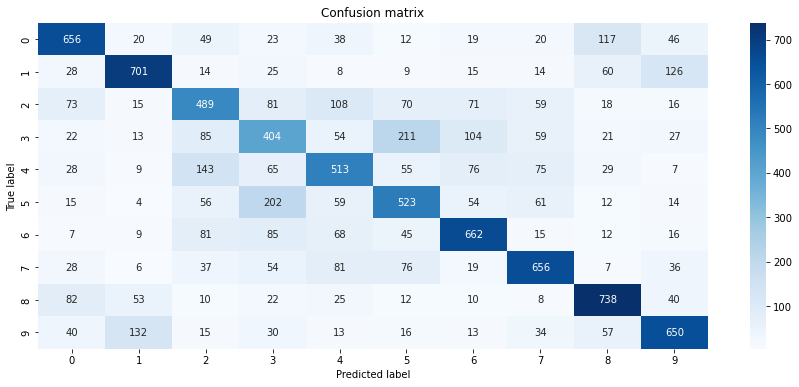

2021-11-14 14:49:03.383036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 59.92%
Loss: 1.4047290086746216



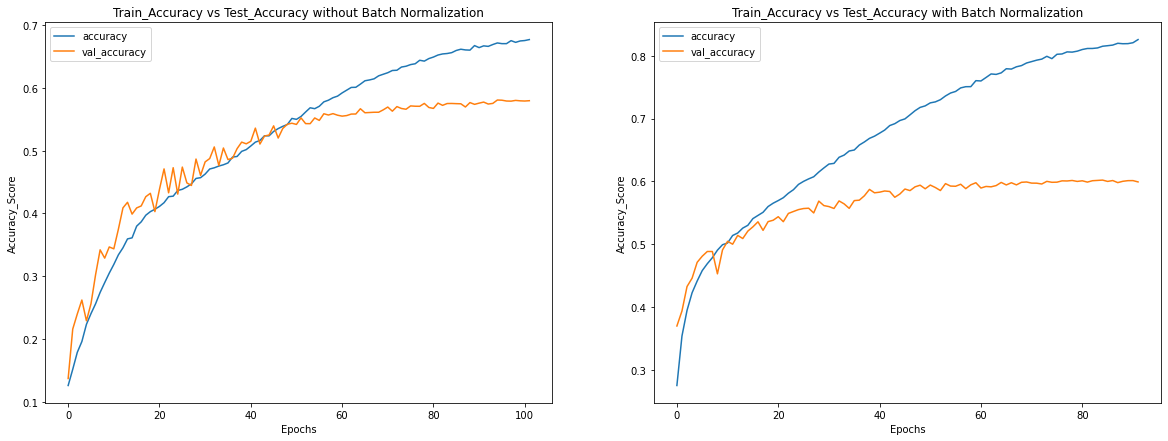

In [78]:
mlp_b = my_design_batch('elu', Nadam(learning_rate=0.001))
main(mlp_b)

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-14 14:49:07.090053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 99/100 [============================>.] - ETA: 0s - loss: 2.2354 - accuracy: 0.2485

2021-11-14 14:49:10.695162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 4s 36ms/step - loss: 2.2332 - accuracy: 0.2488 - val_loss: 1.9414 - val_accuracy: 0.3197
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 4s 35ms/step - loss: 1.9467 - accuracy: 0.3182 - val_loss: 1.9719 - val_accuracy: 0.2988
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 3s 35ms/step - loss: 1.8374 - accuracy: 0.3498 - val_loss: 1.7423 - val_accuracy: 0.3759
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 3s 35ms/step - loss: 1.7631 - accuracy: 0.3752 - val_loss: 1.8799 - val_accuracy: 0.3577
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 4s 35ms/step - loss: 1.7168 - accuracy: 0.

2021-11-14 14:51:01.483177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.56      0.59      0.58      1000
           1       0.77      0.51      0.61      1000
           2       0.38      0.41      0.39      1000
           3       0.36      0.39      0.37      1000
           4       0.43      0.52      0.47      1000
           5       0.43      0.40      0.41      1000
           6       0.53      0.58      0.56      1000
           7       0.65      0.50      0.56      1000
           8       0.60      0.68      0.64      1000
           9       0.59      0.59      0.59      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



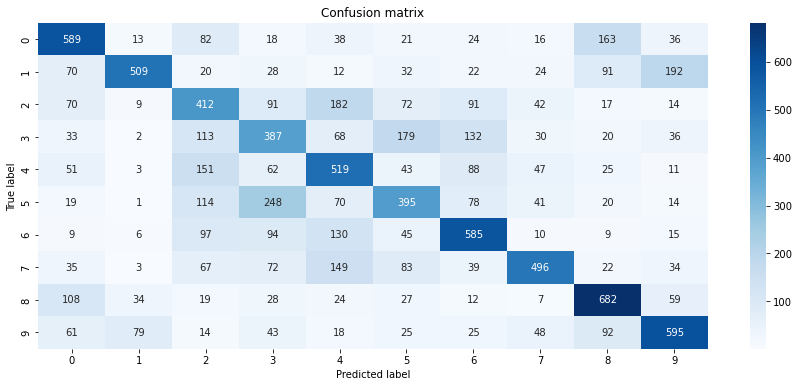

2021-11-14 14:51:02.470803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 51.69%
Loss: 1.3583011627197266



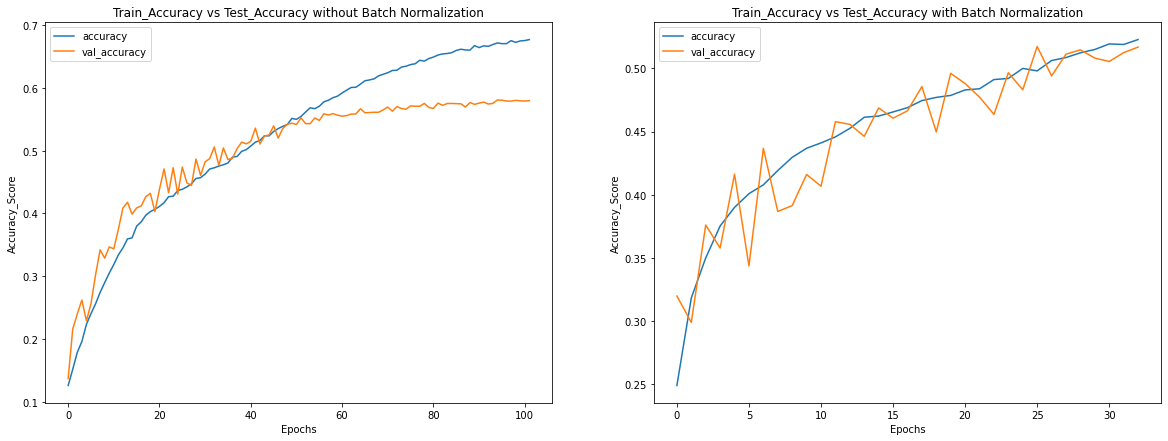

In [79]:
mlp_b = my_design_batch('relu', RMSprop(learning_rate=0.001))
main(mlp_b)

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-14 14:51:05.382529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 99/100 [============================>.] - ETA: 0s - loss: 2.2160 - accuracy: 0.2518

2021-11-14 14:51:10.006111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 5s 46ms/step - loss: 2.2130 - accuracy: 0.2526 - val_loss: 2.1423 - val_accuracy: 0.2577
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 4s 43ms/step - loss: 1.9076 - accuracy: 0.3227 - val_loss: 1.7469 - val_accuracy: 0.3661
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 4s 43ms/step - loss: 1.8001 - accuracy: 0.3573 - val_loss: 1.7185 - val_accuracy: 0.3791
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 4s 43ms/step - loss: 1.7477 - accuracy: 0.3729 - val_loss: 1.6554 - val_accuracy: 0.4009
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 4s 43ms/step - loss: 1.7073 - accuracy: 0.

100/100 [==============================] - 4s 43ms/step - loss: 1.3129 - accuracy: 0.5294 - val_loss: 1.3286 - val_accuracy: 0.5247
Epoch 38/150

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0006282551475560018.
100/100 [==============================] - 4s 43ms/step - loss: 1.3043 - accuracy: 0.5312 - val_loss: 1.3375 - val_accuracy: 0.5210
Epoch 39/150

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0006127325744974888.
100/100 [==============================] - 4s 43ms/step - loss: 1.2955 - accuracy: 0.5346 - val_loss: 1.3269 - val_accuracy: 0.5289
Epoch 40/150

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0005972052113739428.
100/100 [==============================] - 4s 43ms/step - loss: 1.2884 - accuracy: 0.5384 - val_loss: 1.3306 - val_accuracy: 0.5209
Epoch 41/150

Epoch 00041: LearningRateScheduler reducing learning rate to 0.0005816933646036143.
100/100 [==============================] - 4s 43ms/step - loss: 1.2835 - accurac

2021-11-14 14:55:33.243332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.62      0.59      0.60      1000
           1       0.75      0.54      0.63      1000
           2       0.38      0.45      0.41      1000
           3       0.36      0.44      0.40      1000
           4       0.41      0.53      0.47      1000
           5       0.49      0.35      0.41      1000
           6       0.53      0.62      0.57      1000
           7       0.71      0.47      0.57      1000
           8       0.62      0.71      0.66      1000
           9       0.63      0.59      0.61      1000

    accuracy                           0.53     10000
   macro avg       0.55      0.53      0.53     10000
weighted avg       0.55      0.53      0.53     10000



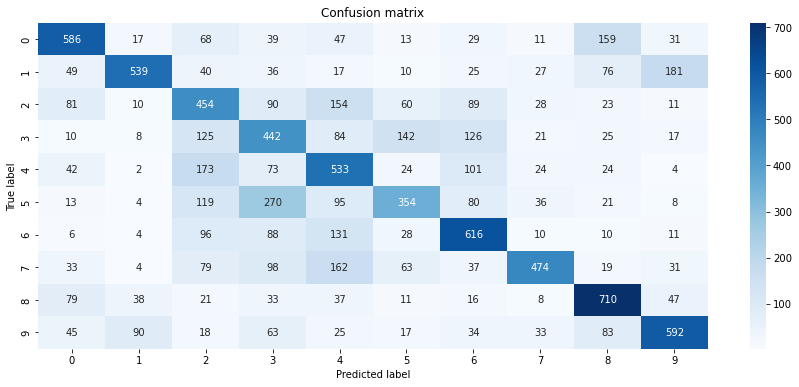

2021-11-14 14:55:34.255013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 53.0%
Loss: 1.3195364475250244



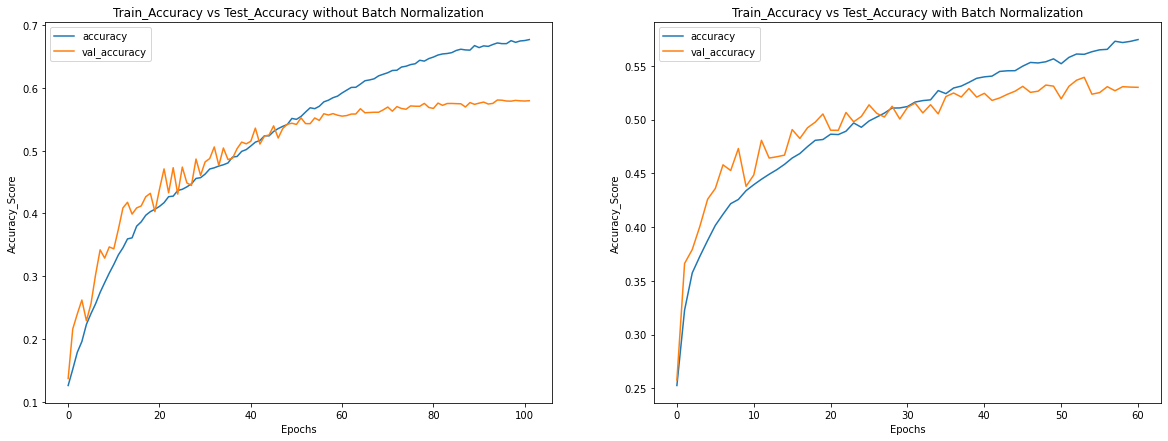

In [80]:
mlp_b = my_design_batch('relu', Nadam(learning_rate=0.001))
main(mlp_b)